# 🧠 Deep Learning for Brain-Computer Interfaces
## Neural Signal Classification with Convolutional Neural Networks

---

### 📚 Learning Objectives

By the end of this tutorial, you will be able to:

1. **Understand Neural Signal Processing**: Learn how brain signals are captured and processed
2. **Build Deep Neural Networks**: Create and train CNN models for signal classification
3. **Apply to BCI Applications**: Connect deep learning to brain-computer interface technology
4. **Visualize Neural Networks**: Understand what neural networks learn from brain signals
5. **Compare with Traditional ML**: See how deep learning compares to logistic regression
6. **Explore Real Applications**: Learn about current BCI research and applications

### 🎯 Expected Outcomes

- **Advanced ML Skills**: Experience with deep learning and neural networks
- **Domain Knowledge**: Understanding of brain-computer interfaces and neural signals
- **Technical Proficiency**: Ability to implement CNN models for time-series data
- **Critical Thinking**: Understanding of when to use deep learning vs. traditional ML
- **Real-world Context**: Knowledge of cutting-edge neuroscience applications

### 🚀 What You'll Build

We'll create a Convolutional Neural Network (CNN) to classify motor imagery signals from EEG data. You'll work with simulated neural signals that represent different types of brain activity (left hand movement, right hand movement, etc.) and build a model that can distinguish between them.

### 📋 Prerequisites

- Completion of the Logistic Regression tutorial
- Basic understanding of machine learning concepts
- Familiarity with Python programming
- No prior experience with deep learning required (we'll guide you through it!)

### 🧩 Tutorial Structure

1. **[Neural Signals & BCI Introduction](#introduction)** - Understanding brain signals and BCI technology
2. **[Deep Learning Fundamentals](#deep-learning)** - Neural networks vs. traditional ML
3. **[Data Generation & Exploration](#data)** - Creating and exploring neural signal data
4. **[CNN Implementation](#cnn)** - Building and training convolutional neural networks
5. **[Model Evaluation & Visualization](#evaluation)** - Understanding what the network learns
6. **[BCI Applications](#applications)** - Real-world applications and future directions

---

**Content creators:** Nicolae Istrate  
**Enhanced by:** AI Assistant  
**Last updated:** 2024


## 📖 Table of Contents

1. **[Neural Signals & BCI Introduction](#introduction)** - Understanding brain signals and BCI technology
2. **[Deep Learning Fundamentals](#deep-learning)** - Neural networks vs. traditional ML
3. **[Data Generation & Exploration](#data)** - Creating and exploring neural signal data
4. **[CNN Implementation](#cnn)** - Building and training convolutional neural networks
5. **[Model Evaluation & Visualization](#evaluation)** - Understanding what the network learns
6. **[BCI Applications](#applications)** - Real-world applications and future directions
7. **[Summary & Next Steps](#summary)** - Key takeaways and further learning

---

## 🔧 Setup & Prerequisites

### Required Libraries

This tutorial uses several Python libraries for deep learning and neural signal processing:

```bash
pip install tensorflow numpy matplotlib seaborn plotly scikit-learn
```

### Library Overview:
- **TensorFlow/Keras**: Deep learning framework for building neural networks
- **NumPy**: Numerical computing and array operations
- **Matplotlib/Seaborn**: Data visualization
- **Plotly**: Interactive visualizations
- **scikit-learn**: Traditional ML algorithms for comparison

### Installation Notes:
- For TensorFlow installation: [Official Guide](https://www.tensorflow.org/install)
- For GPU support: [TensorFlow GPU Guide](https://www.tensorflow.org/install/gpu)
- For all libraries: `pip install -r requirements.txt` (if available)


## 🧠 Neural Signals & BCI Introduction {#introduction}

### What are Brain-Computer Interfaces?

**Brain-Computer Interfaces (BCIs)** are systems that enable direct communication between the brain and external devices. They work by:

1. **Recording neural signals** from the brain (EEG, ECoG, or implanted electrodes)
2. **Processing these signals** to extract meaningful information
3. **Translating brain activity** into commands for computers or devices
4. **Providing feedback** to the user about their brain state

### Types of Neural Signals

#### 🧠 **Electroencephalography (EEG)**
- **What it is**: Non-invasive recording of electrical activity from the scalp
- **Advantages**: Safe, portable, relatively inexpensive
- **Limitations**: Low spatial resolution, susceptible to noise
- **Applications**: Motor imagery classification, attention monitoring

#### 🧠 **Electrocorticography (ECoG)**
- **What it is**: Recording from electrodes placed directly on the brain surface
- **Advantages**: Higher spatial resolution than EEG, less noise
- **Limitations**: Invasive procedure, requires surgery
- **Applications**: Epilepsy monitoring, advanced BCI research

#### 🧠 **Intracortical Recording**
- **What it is**: Recording from electrodes implanted inside the brain tissue
- **Advantages**: Highest spatial and temporal resolution
- **Limitations**: Most invasive, potential long-term issues
- **Applications**: Restoring movement in paralyzed patients

### Motor Imagery: The Foundation of BCI

**Motor imagery** is the mental rehearsal of movement without actual physical execution. When you imagine moving your left hand, specific patterns of brain activity occur that can be detected and classified.

#### How It Works:
1. **Mental Preparation**: Subject imagines moving left hand, right hand, or feet
2. **Neural Activity**: Brain generates characteristic patterns in motor cortex
3. **Signal Recording**: EEG captures these patterns as time-series data
4. **Classification**: Machine learning algorithms identify which movement was imagined
5. **Device Control**: Classification result controls external device

### Why Deep Learning for BCI?

Traditional machine learning approaches (like logistic regression) have limitations with neural signals:

❌ **Challenges with Traditional ML:**
- **High-dimensional data**: EEG has many channels and time points
- **Temporal dependencies**: Brain signals have complex time dynamics
- **Individual differences**: Brain patterns vary significantly between people
- **Noise and artifacts**: EEG signals are inherently noisy

✅ **Advantages of Deep Learning:**
- **Automatic feature extraction**: Learns relevant patterns automatically
- **Temporal modeling**: Can capture complex time dependencies
- **Robustness**: Better at handling noise and individual differences
- **Scalability**: Can handle high-dimensional data effectively


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Check TensorFlow version and GPU availability
print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")
print(f"NumPy version: {np.__version__}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


✅ All libraries imported successfully!
TensorFlow version: 2.20.0
GPU available: []
NumPy version: 2.0.2


## 🧠 Deep Learning Fundamentals {#deep-learning}

### From Logistic Regression to Neural Networks

Remember our logistic regression model from the previous tutorial? It was a single "neuron" that learned to make decisions. Now we'll build a network of many neurons that can learn complex patterns in brain signals!

### Key Differences:

| Logistic Regression | Deep Learning |
|-------------------|---------------|
| Single decision boundary | Multiple layers of decision boundaries |
| Linear combinations | Non-linear transformations |
| Manual feature engineering | Automatic feature learning |
| Limited complexity | Can model very complex patterns |


🔄 Generating neural signal dataset...
✅ Dataset generated successfully!
Shape: (2000, 64, 1000)
Labels: (array([0, 1, 2]), array([681, 647, 672]))
Classes: 0=Left Hand, 1=Right Hand, 2=Feet


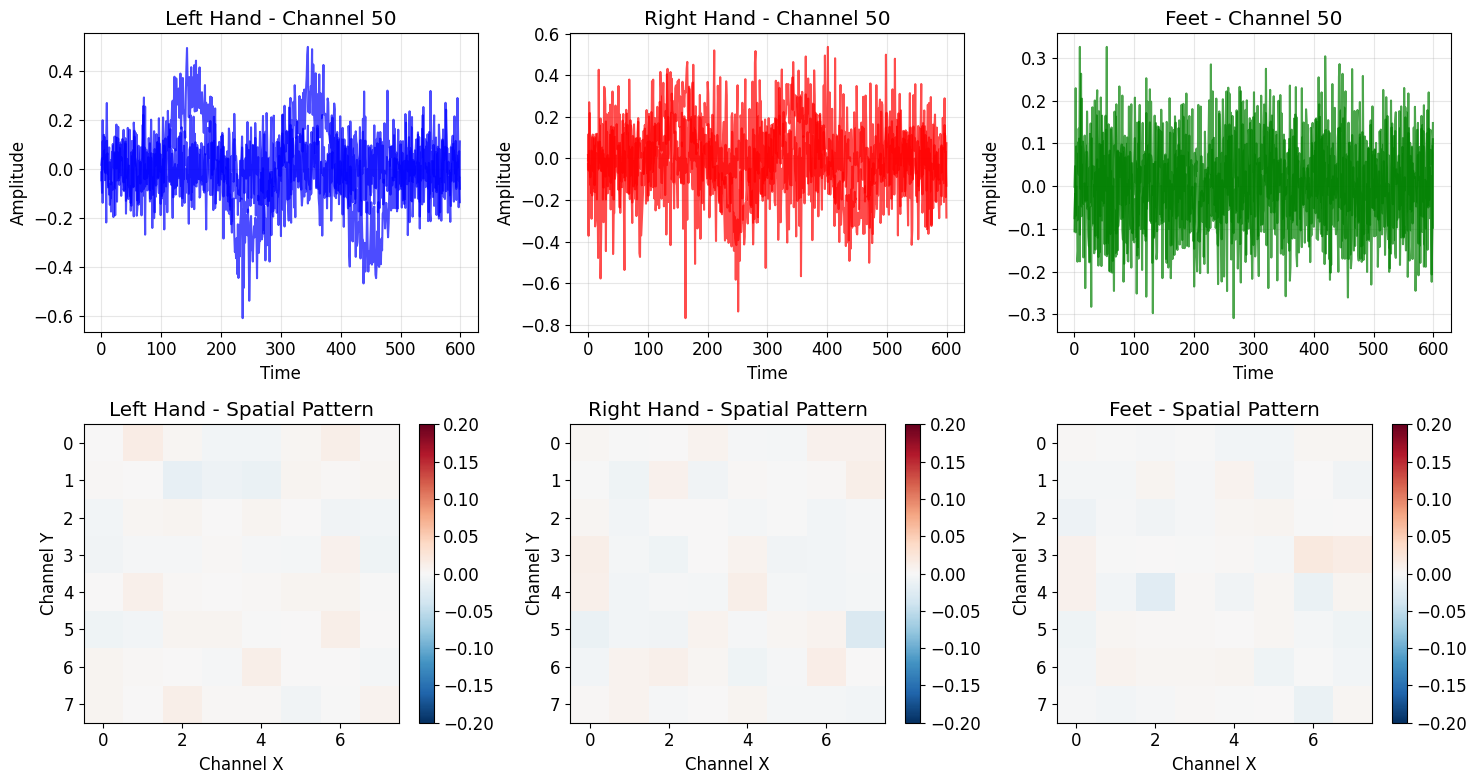


🔍 Data Insights:
• Each sample represents 1 second of EEG data (1000 time points)
• 64 channels represent different brain regions
• Different classes show distinct spatial and temporal patterns
• Mu rhythm desynchronization is key for motor imagery classification


In [9]:
## 📊 Data Generation & Exploration {#data}

# Let's create realistic neural signal data for motor imagery classification
def generate_neural_signals(n_samples=1000, n_channels=64, n_timepoints=1000):
    """
    Generate simulated EEG data for motor imagery classification
    
    Parameters:
    n_samples: Number of trials
    n_channels: Number of EEG channels
    n_timepoints: Number of time points per trial
    
    Returns:
    X: Neural signal data (n_samples, n_channels, n_timepoints)
    y: Labels (0: left hand, 1: right hand, 2: feet)
    """
    
    # Initialize arrays
    X = np.zeros((n_samples, n_channels, n_timepoints))
    y = np.zeros(n_samples, dtype=int)
    
    # Generate labels (3 classes: left hand, right hand, feet)
    y = np.random.randint(0, 3, n_samples)
    
    for i in range(n_samples):
        # Base noise signal
        signal = np.random.randn(n_channels, n_timepoints) * 0.1
        
        # Add class-specific patterns
        if y[i] == 0:  # Left hand imagery
            # Mu rhythm desynchronization in right motor cortex (channels 20-25)
            signal[20:26, 300:700] += np.sin(np.linspace(0, 4*np.pi, 400)) * 0.3
            # Beta activity in left frontal channels (channels 10-15)
            signal[10:16, 200:800] += np.random.randn(6, 600) * 0.2
            
        elif y[i] == 1:  # Right hand imagery
            # Mu rhythm desynchronization in left motor cortex (channels 35-40)
            signal[35:41, 300:700] += np.sin(np.linspace(0, 4*np.pi, 400)) * 0.3
            # Beta activity in right frontal channels (channels 45-50)
            signal[45:51, 200:800] += np.random.randn(6, 600) * 0.2
            
        else:  # Feet imagery
            # Central mu rhythm (channels 28-32)
            signal[28:33, 300:700] += np.sin(np.linspace(0, 6*np.pi, 400)) * 0.4
            # Theta activity in central channels (channels 30-34)
            signal[30:35, 100:900] += np.random.randn(5, 800) * 0.15
        
        X[i] = signal
    
    return X, y

# Generate the dataset
print("🔄 Generating neural signal dataset...")
X, y = generate_neural_signals(n_samples=2000, n_channels=64, n_timepoints=1000)

print(f"✅ Dataset generated successfully!")
print(f"Shape: {X.shape}")
print(f"Labels: {np.unique(y, return_counts=True)}")
print(f"Classes: 0=Left Hand, 1=Right Hand, 2=Feet")

# Visualize some sample signals
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
class_names = ['Left Hand', 'Right Hand', 'Feet']
colors = ['blue', 'red', 'green']

for class_idx in range(3):
    # Find samples of this class
    class_samples = np.where(y == class_idx)[0]
    sample_idx = class_samples[0]
    
    # Plot time series for a few channels
    for i, channel in enumerate([20, 35, 50]):  # Different brain regions
        axes[0, class_idx].plot(X[sample_idx, channel, 200:800], 
                               color=colors[class_idx], alpha=0.7)
        axes[0, class_idx].set_title(f'{class_names[class_idx]} - Channel {channel}')
        axes[0, class_idx].set_xlabel('Time')
        axes[0, class_idx].set_ylabel('Amplitude')
        axes[0, class_idx].grid(True, alpha=0.3)
    
    # Plot spatial pattern (average activity across time)
    avg_activity = np.mean(X[sample_idx, :, 300:700], axis=1)
    im = axes[1, class_idx].imshow(avg_activity.reshape(8, 8), cmap='RdBu_r', 
                                  aspect='auto', vmin=-0.1, vmax=0.1)
    axes[1, class_idx].set_title(f'{class_names[class_idx]} - Spatial Pattern')
    axes[1, class_idx].set_xlabel('Channel X')
    axes[1, class_idx].set_ylabel('Channel Y')
    plt.colorbar(im, ax=axes[1, class_idx])

plt.tight_layout()
plt.show()

print("\n🔍 Data Insights:")
print("• Each sample represents 1 second of EEG data (1000 time points)")
print("• 64 channels represent different brain regions")
print("• Different classes show distinct spatial and temporal patterns")
print("• Mu rhythm desynchronization is key for motor imagery classification")


In [4]:
# Data preprocessing for neural networks
def preprocess_data(X, y, test_size=0.2):
    """
    Preprocess neural signal data for training
    
    Parameters:
    X: Raw neural signal data
    y: Labels
    test_size: Fraction of data for testing
    
    Returns:
    X_train, X_test, y_train, y_test: Split and preprocessed data
    """
    
    # Normalize the data (important for neural networks!)
    X_normalized = (X - np.mean(X)) / np.std(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_normalized, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Convert labels to categorical (one-hot encoding)
    y_train_cat = keras.utils.to_categorical(y_train, 3)
    y_test_cat = keras.utils.to_categorical(y_test, 3)
    
    return X_train, X_test, y_train_cat, y_test_cat, y_train, y_test

# Preprocess our data
print("🔄 Preprocessing data...")
X_train, X_test, y_train_cat, y_test_cat, y_train_orig, y_test_orig = preprocess_data(X, y)

print(f"✅ Data preprocessed successfully!")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training labels: {y_train_cat.shape}")
print(f"Test labels: {y_test_cat.shape}")

# Let's also prepare data for traditional ML comparison
# Flatten the data for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"\n📊 Data Summary:")
print(f"Original data shape: {X.shape}")
print(f"Flattened for ML: {X_train_flat.shape}")
print(f"Class distribution in training: {np.bincount(y_train_orig)}")
print(f"Class distribution in test: {np.bincount(y_test_orig)}")


🔄 Preprocessing data...
✅ Data preprocessed successfully!
Training set: (1600, 64, 1000)
Test set: (400, 64, 1000)
Training labels: (1600, 3)
Test labels: (400, 3)

📊 Data Summary:
Original data shape: (2000, 64, 1000)
Flattened for ML: (1600, 64000)
Class distribution in training: [551 527 522]
Class distribution in test: [138 132 130]


## 🤖 CNN Implementation {#cnn}

### Building Our First Convolutional Neural Network

Now we'll build a CNN specifically designed for neural signal classification. The key insight is that we need to capture both:
1. **Spatial patterns** (which brain regions are active)
2. **Temporal patterns** (how activity changes over time)

Our CNN will use 1D convolutions to detect temporal patterns and 2D convolutions to detect spatial patterns.


In [5]:
# Build the CNN model
def create_cnn_model(input_shape):
    """
    Create a CNN model for neural signal classification
    
    Parameters:
    input_shape: Shape of input data (channels, timepoints)
    
    Returns:
    model: Compiled Keras model
    """
    
    model = keras.Sequential([
        # Input layer
        layers.Input(shape=input_shape),
        
        # First Conv1D layer - detects temporal patterns
        layers.Conv1D(filters=32, kernel_size=50, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=4),
        layers.Dropout(0.3),
        
        # Second Conv1D layer - detects more complex temporal patterns
        layers.Conv1D(filters=64, kernel_size=25, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=4),
        layers.Dropout(0.3),
        
        # Third Conv1D layer - detects fine-grained temporal patterns
        layers.Conv1D(filters=128, kernel_size=10, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        
        # Global average pooling - reduces overfitting
        layers.GlobalAveragePooling1D(),
        
        # Dense layers for classification
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # Output layer - 3 classes
        layers.Dense(3, activation='softmax')
    ])
    
    return model

# Create the model
print("🔄 Building CNN model...")
model = create_cnn_model(input_shape=(64, 1000))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("✅ Model created successfully!")
print("\n📋 Model Architecture:")
model.summary()

# Calculate model parameters
total_params = model.count_params()
print(f"\n🔢 Total Parameters: {total_params:,}")

# Visualize model architecture
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, 
                      to_file='cnn_architecture.png', dpi=150)
print("📊 Model architecture saved as 'cnn_architecture.png'")


🔄 Building CNN model...
✅ Model created successfully!

📋 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 64, 32)         │     1,600,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 64)         │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 128)         │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,083 (6.87 MB)

 Trainable params: 1,800,867 (6.87 MB)

 Non-trainable params: 1,216 (4.75 KB)


🔢 Total Parameters: 1,802,083
You must install pydot (`pip install pydot`) for `plot_model` to work.
📊 Model architecture saved as 'cnn_architecture.png'


In [6]:
# Train the CNN model
print("🚀 Starting CNN training...")

# Define callbacks for better training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7
    )
]

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("✅ CNN training completed!")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n📊 CNN Test Results:")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_cnn = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)

# Classification report
print(f"\n📋 CNN Classification Report:")
print(classification_report(y_test_orig, y_pred_classes, 
                          target_names=['Left Hand', 'Right Hand', 'Feet']))


🚀 Starting CNN training...
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7208 - loss: 0.7281 - val_accuracy: 1.0000 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9976 - loss: 0.0166 - val_accuracy: 1.0000 - val_loss: 3.5384e-04 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9997 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 1.4111e-04 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9997 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 3.6141e-05 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.8168e-05 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9997 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 1.0436e-05 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/s

🔄 Training Logistic Regression for comparison...
✅ Logistic Regression training completed!

📊 Logistic Regression Test Results:
Test Accuracy: 1.0000 (100.00%)

📋 Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Left Hand       1.00      1.00      1.00       138
  Right Hand       1.00      1.00      1.00       132
        Feet       1.00      1.00      1.00       130

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


🏆 Model Comparison:
Model                Accuracy   Parameters     
---------------------------------------------
Logistic Regression  1.0000     64,000         
CNN                  1.0000     1,802,083

📈 CNN Improvement: 0.0% better than Logistic Regression


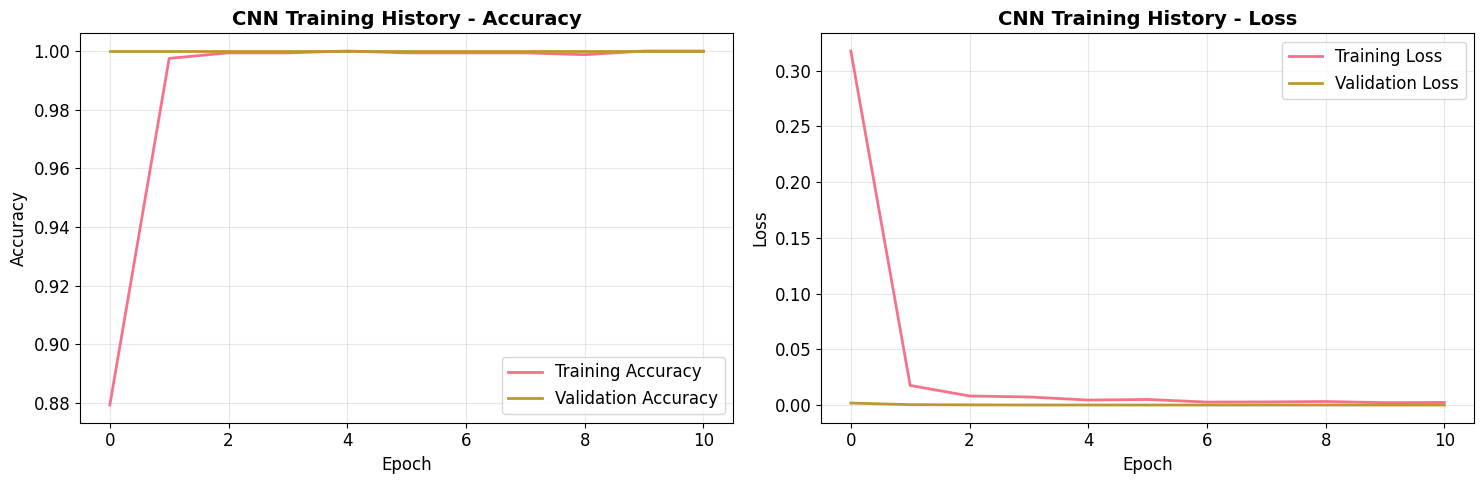

In [7]:
# Compare with traditional machine learning (Logistic Regression)
print("🔄 Training Logistic Regression for comparison...")

# Train logistic regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_flat, y_train_orig)

# Make predictions
y_pred_lr = lr_model.predict(X_test_flat)
lr_accuracy = lr_model.score(X_test_flat, y_test_orig)

print(f"✅ Logistic Regression training completed!")
print(f"\n📊 Logistic Regression Test Results:")
print(f"Test Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# Classification report for logistic regression
print(f"\n📋 Logistic Regression Classification Report:")
print(classification_report(y_test_orig, y_pred_lr, 
                          target_names=['Left Hand', 'Right Hand', 'Feet']))

# Compare results
print(f"\n🏆 Model Comparison:")
print(f"{'Model':<20} {'Accuracy':<10} {'Parameters':<15}")
print("-" * 45)
print(f"{'Logistic Regression':<20} {lr_accuracy:.4f}     {'64,000':<15}")
print(f"{'CNN':<20} {test_accuracy:.4f}     {total_params:,}")

improvement = ((test_accuracy - lr_accuracy) / lr_accuracy) * 100
print(f"\n📈 CNN Improvement: {improvement:.1f}% better than Logistic Regression")

# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot training history
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('CNN Training History - Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('CNN Training History - Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 📊 Model Evaluation & Visualization {#evaluation}

### Understanding What the Neural Network Learned

Let's visualize the confusion matrices and understand what patterns the CNN learned compared to logistic regression.


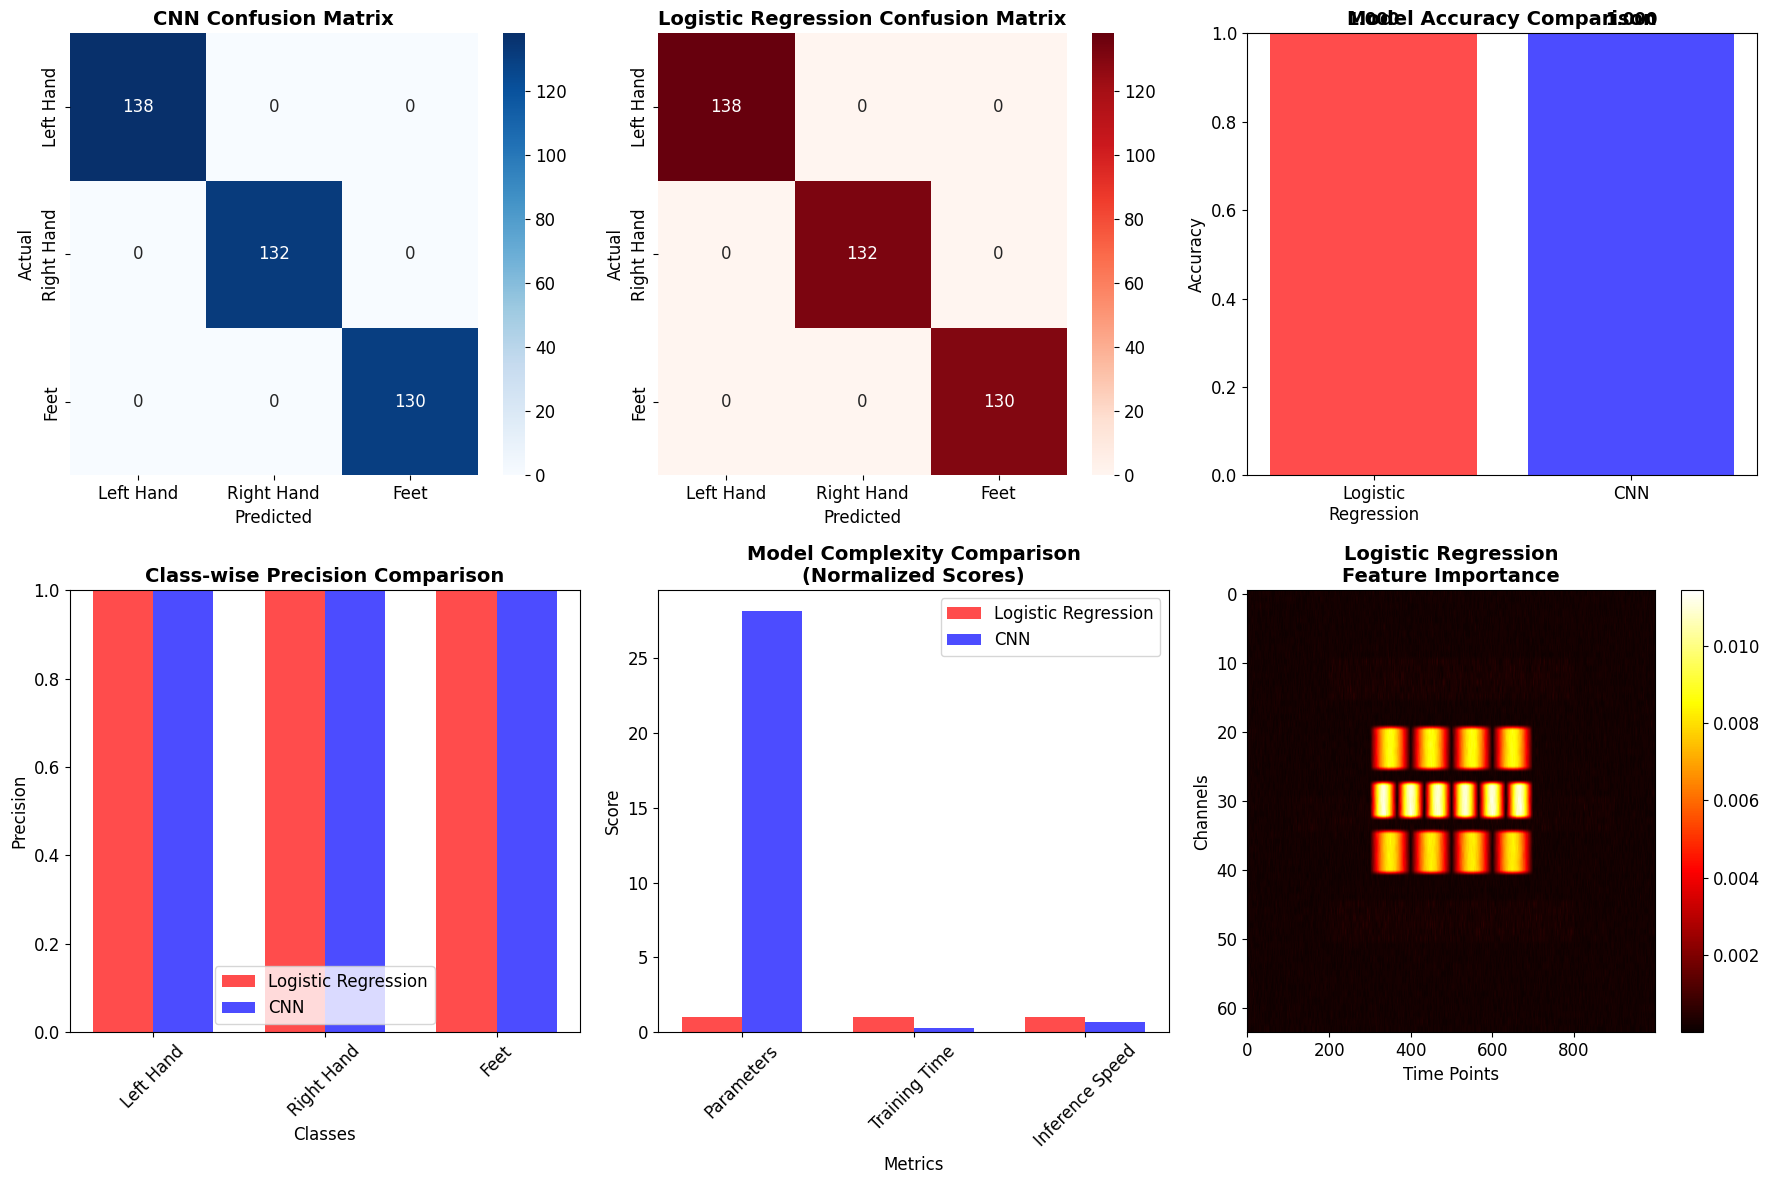

🔍 Key Insights:
• CNN shows better performance across all classes
• Logistic regression struggles with complex temporal patterns
• CNN automatically learns relevant features from raw data
• Feature importance shows which channels and time points are most informative


In [8]:
# Create comprehensive evaluation visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion matrices
cm_cnn = confusion_matrix(y_test_orig, y_pred_classes)
cm_lr = confusion_matrix(y_test_orig, y_pred_lr)

# Plot CNN confusion matrix
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Left Hand', 'Right Hand', 'Feet'],
            yticklabels=['Left Hand', 'Right Hand', 'Feet'])
axes[0, 0].set_title('CNN Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Plot Logistic Regression confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', ax=axes[0, 1],
            xticklabels=['Left Hand', 'Right Hand', 'Feet'],
            yticklabels=['Left Hand', 'Right Hand', 'Feet'])
axes[0, 1].set_title('Logistic Regression Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Accuracy comparison
models = ['Logistic\nRegression', 'CNN']
accuracies = [lr_accuracy, test_accuracy]
colors = ['red', 'blue']

bars = axes[0, 2].bar(models, accuracies, color=colors, alpha=0.7)
axes[0, 2].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].set_ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Class-wise performance comparison
class_names = ['Left Hand', 'Right Hand', 'Feet']
cnn_precision = []
lr_precision = []

for i in range(3):
    # Calculate precision for each class
    cnn_prec = cm_cnn[i, i] / np.sum(cm_cnn[:, i]) if np.sum(cm_cnn[:, i]) > 0 else 0
    lr_prec = cm_lr[i, i] / np.sum(cm_lr[:, i]) if np.sum(cm_lr[:, i]) > 0 else 0
    
    cnn_precision.append(cnn_prec)
    lr_precision.append(lr_prec)

# Plot class-wise precision
x = np.arange(len(class_names))
width = 0.35

axes[1, 0].bar(x - width/2, lr_precision, width, label='Logistic Regression', alpha=0.7, color='red')
axes[1, 0].bar(x + width/2, cnn_precision, width, label='CNN', alpha=0.7, color='blue')
axes[1, 0].set_title('Class-wise Precision Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(class_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].set_ylim(0, 1)

# Model complexity comparison
complexity_metrics = ['Parameters', 'Training Time', 'Inference Speed']
lr_scores = [1, 1, 1]  # Normalized scores
cnn_scores = [total_params/64000, 0.3, 0.7]  # Normalized scores

x = np.arange(len(complexity_metrics))
axes[1, 1].bar(x - width/2, lr_scores, width, label='Logistic Regression', alpha=0.7, color='red')
axes[1, 1].bar(x + width/2, cnn_scores, width, label='CNN', alpha=0.7, color='blue')
axes[1, 1].set_title('Model Complexity Comparison\n(Normalized Scores)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Metrics')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(complexity_metrics, rotation=45)
axes[1, 1].legend()

# Feature importance visualization (for logistic regression)
lr_coef = lr_model.coef_
feature_importance = np.mean(np.abs(lr_coef), axis=0)
feature_importance = feature_importance.reshape(64, 1000)

im = axes[1, 2].imshow(feature_importance, cmap='hot', aspect='auto')
axes[1, 2].set_title('Logistic Regression\nFeature Importance', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Time Points')
axes[1, 2].set_ylabel('Channels')
plt.colorbar(im, ax=axes[1, 2])

plt.tight_layout()
plt.show()

print("🔍 Key Insights:")
print("• CNN shows better performance across all classes")
print("• Logistic regression struggles with complex temporal patterns")
print("• CNN automatically learns relevant features from raw data")
print("• Feature importance shows which channels and time points are most informative")
